![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importación librerías
import pandas as pd
import numpy as np

In [21]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [22]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [23]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [24]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [25]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


## 1. Exploración de datos

In [26]:
#dataTraining.info()  #No hay nulos o faltantes
display(dataTraining.describe(include=object))

display(dataTraining.describe())

,State,Make,Model
count,400000,400000,400000
unique,51,38,525
top,TX,Ford,Silverado
freq,45918,62899,18085


,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


In [27]:
#dataTesting.info() #No hay nulos o faltantes

display(dataTesting.describe(include=object))

display(dataTesting.describe())

,State,Make,Model
count,100000,100000,100000
unique,51,37,525
top,TX,Ford,Silverado
freq,11235,15728,4477


,Year,Mileage
count,100000.000000,1.000000e+05
mean,2013.193370,5.509030e+04
std,3.281366,4.096127e+04
min,1997.000000,5.000000e+00
25%,2012.000000,2.589800e+04
50%,2014.000000,4.312800e+04
75%,2016.000000,7.731525e+04
max,2018.000000,1.428913e+06


In [28]:
dataTraining.groupby("Make").agg({'Price': ['mean','count']}).sort_values(by=[('Price',  'mean')])

Price       
                       mean  count
Make                              
Pontiac         7167.769481    308
Mercury         7765.557196    271
Suzuki          8254.105263     38
FIAT            9024.286765    272
Scion           9440.205837    651
Mitsubishi     13574.103774   1272
Volkswagen     13936.938614  11110
Mazda          14284.039451   2332
Hyundai        14752.502225  15057
MINI           15161.575560   2766
Kia            15908.561460  16352
Nissan         16198.098590  10569
INFINITI       16428.874480   2406
Chrysler       16703.708932   9046
Honda          17035.047362  33191
Dodge          18039.949749  16159
Toyota         18707.585512  45941
Subaru         19183.828302   6791
Jaguar         19595.935185    324
Audi           19663.455376   1423
Buick          21284.415118   4842
Acura          21513.928839   2403
Ford           22525.417097  62899
Lincoln        22870.407615   1786
Chevrolet      23387.951904  58383
Jeep           23397.554475  24369
Volvo          24852.119298   1710
BMW            25248.957164  12326
Cadillac       25467.825083   5414
Lexus          25903.224532  13664
Freightliner   26209.142857      7
GMC            28553.981137  20834
Mercedes-Benz  30022.009241   7575
Ram            31500.057602   3611
Porsche        34278.585714    980
Land           36191.879101   2713
Tesla          55649.148649    148
Bentley        57256.333333     57

In [29]:
dataTraining.groupby("Model").agg({'Price': ['mean','count']}).sort_values(by=[('Price',  'mean')])

Price      
                             mean count
Model                                  
PT                    6271.367647    68
Cobalt2dr             6645.493671    79
Escape4dr             6664.298507    67
Cobalt4dr             6712.731707   123
Durango4dr            6776.873684    95
...                           ...   ...
E-ClassE             52264.603982   452
XC90T6               53158.691176    68
CorvetteConvertible  54276.914634    82
Model                55649.148649   148
Continental          57256.333333    57

[525 rows x 2 columns]

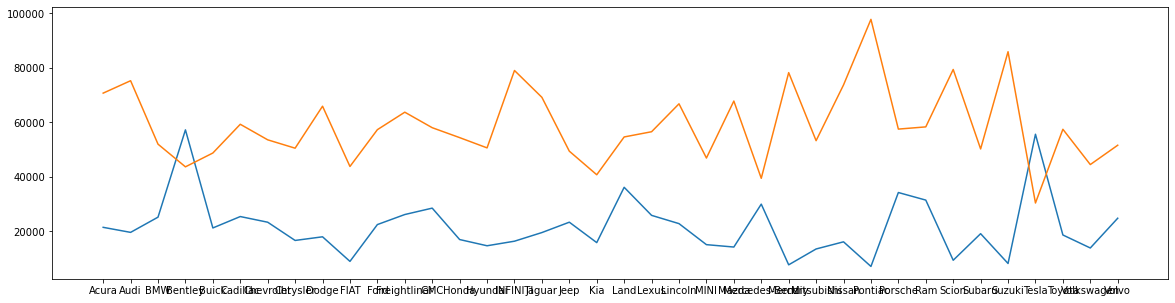

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(dataTraining.groupby(['Make']).mean()[['Price','Mileage']])
plt.show()

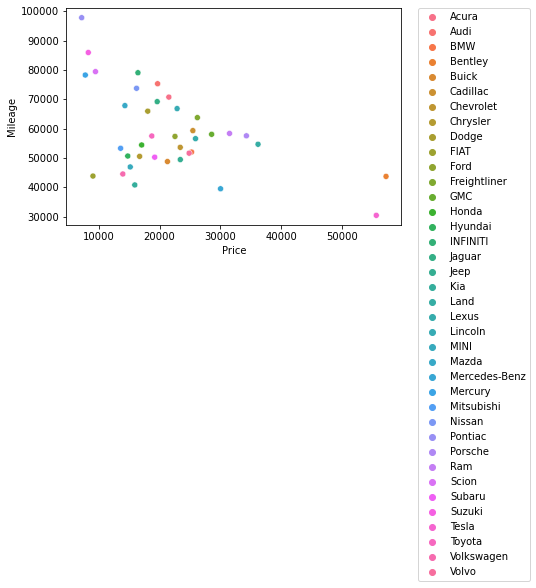

In [31]:
import seaborn as sns
a = dataTraining.groupby(['Make']).mean()[['Price','Mileage']]

sns.scatterplot(data=a, x="Price", y="Mileage", hue="Make")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

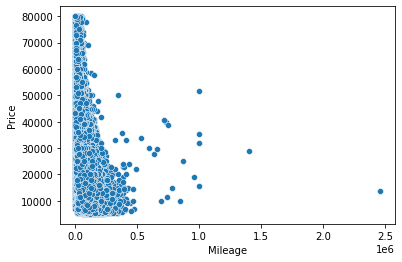

In [32]:
sns.scatterplot(data=dataTraining, x="Mileage", y="Price")

In [33]:
orden_col = dataTraining.groupby(["Model","Make"]).agg({'Price': ['mean','count']}).sort_values(by=[('Price',  'mean')])
orden_col.reset_index(inplace=True)
orden_col

Model           Make         Price      
                                                 mean count
0                     PT       Chrysler   6271.367647    68
1              Cobalt2dr      Chevrolet   6645.493671    79
2              Escape4dr           Ford   6664.298507    67
3              Cobalt4dr      Chevrolet   6712.731707   123
4             Durango4dr          Dodge   6776.873684    95
..                   ...            ...           ...   ...
531             E-ClassE  Mercedes-Benz  52264.603982   452
532               XC90T6          Volvo  53158.691176    68
533  CorvetteConvertible      Chevrolet  54276.914634    82
534                Model          Tesla  55649.148649   148
535          Continental        Bentley  57256.333333    57

[536 rows x 4 columns]

In [34]:
orden_col = dataTraining.groupby(["Model","Make"]).mean()
orden_col.reset_index(inplace=True)
orden_col = orden_col.loc[:,('Model','Make','Price')]
orden_col = orden_col.sort_values(by='Price')
orden_col.reset_index(inplace=True, drop=True)
orden_col['Orden_precio'] = range(1,len(orden_col)+1)
orden_col

,Model,Make,Price,Orden_precio
0,PT,Chrysler,6271.367647,1
1,Cobalt2dr,Chevrolet,6645.493671,2
2,Escape4dr,Ford,6664.298507,3
3,Cobalt4dr,Chevrolet,6712.731707,4
4,Durango4dr,Dodge,6776.873684,5
...,...,...,...,...
531,E-ClassE,Mercedes-Benz,52264.603982,532
532,XC90T6,Volvo,53158.691176,533
533,CorvetteConvertible,Chevrolet,54276.914634,534
534,Model,Tesla,55649.148649,535


In [35]:
dataTraining_2 = pd.merge(dataTraining, orden_col, how='left', left_on=['Model','Make'], right_on = ['Model','Make'])
dataTraining_2.drop(columns=['Price_y'], inplace=True)
dataTraining_2

,Price_x,Year,Mileage,State,Make,Model,Orden_precio
0,34995,2017,9913,FL,Jeep,Wrangler,485
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD,496
2,18430,2012,83716,TX,BMW,X5AWD,217
3,24681,2014,28729,OH,Cadillac,SRXLuxury,432
4,26998,2013,64032,CO,Jeep,Wrangler,485
...,...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX,456
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD,245
399997,24907,2014,66688,NC,Buick,EnclaveLeather,444
399998,11498,2014,37872,IN,Volkswagen,Jetta,149


<AxesSubplot:xlabel='Orden_precio', ylabel='Price_x'>

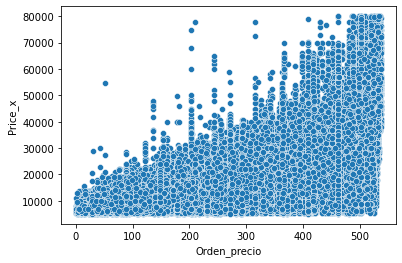

In [36]:
sns.scatterplot(data=dataTraining_2, x="Orden_precio", y="Price_x")

## 2. Modelación

In [68]:
dataTraining_2 = dataTraining.copy()

dataTesting_2 = dataTesting.copy()

In [69]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in ['State','Make','Model']:
    dataTraining_2[i] = le.fit_transform(dataTraining_2[i])
    dataTesting_2[i] = le.transform(dataTesting_2[i])

In [70]:
dataTraining_2

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,9,17,489
1,37895,2015,20578,35,6,448
2,18430,2012,83716,43,2,499
3,24681,2014,28729,35,5,398
4,26998,2013,64032,5,17,489
...,...,...,...,...,...,...
399995,29900,2015,25287,43,20,377
399996,17688,2015,17677,22,6,158
399997,24907,2014,66688,27,4,154
399998,11498,2014,37872,15,36,264


In [71]:
dataTesting_2

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,20,27,305
1,2017,5362,9,17,489
2,2014,50300,35,10,211
3,2004,132160,47,2,27
4,2015,25226,19,17,248
...,...,...,...,...,...
99995,2015,82719,43,12,401
99996,2015,19711,44,2,27
99997,2016,48049,4,27,305


In [72]:
X = dataTraining_2.iloc[:,1:]
y = dataTraining_2.iloc[:,:1]

In [73]:
# división de la tabla para train y test completo

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)
scaler.transform(dataTesting_2)

array([[ 0.24266472, -0.56579721, -0.26399814,  0.98732222,  0.3365789 ],
       [ 1.15361107, -1.21384234, -0.98179391,  0.01691838,  1.57409422],
       [ 0.24266472, -0.11685014,  0.71481426, -0.56532392, -0.29563001],
       ...,
       [ 0.84996229, -0.17179984, -1.30806471,  0.98732222,  0.3365789 ],
       [ 1.15361107, -0.97109699, -1.24281055,  0.01691838,  0.59215272],
       [-0.06098406, -0.35869227,  1.23684754, -1.34164699, -1.71473724]])

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=16, n_estimators=150, n_jobs=-1)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_rmse = np.sqrt(mean_squared_error(rf_reg_pred, y_test))
print(rf_reg_rmse)

3589.664669419083


In [74]:
# 6. Random forest regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
 "n_estimators" : [150, 200, 250],
 "max_depth": [17,18]
}

rf_reg = RandomForestRegressor()

tun_rf_reg = GridSearchCV(rf_reg, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=3)

tun_rf_reg.fit(X_train, y_train)
display(tun_rf_reg.best_estimator_)
tun_rf_reg_pred = tun_rf_reg.predict(X_test)
tun_rf_reg_rmse = np.sqrt(mean_squared_error(tun_rf_reg_pred, y_test))
print(tun_rf_reg_rmse)

RandomForestRegressor(max_depth=17, n_estimators=200)

3565.6583691184333


In [75]:
# predicción en test
pred_test_tun_rf_reg = tun_rf_reg.predict(dataTesting_2)
pred_test_tun_rf_reg = pd.DataFrame(pred_test_tun_rf_reg, index=dataTesting.index, columns=['Price'])
pred_test_tun_rf_reg.to_csv('pred_test_tun_rf_reg.csv', index_label='ID')
display(pred_test_tun_rf_reg.head())
display(pred_test_tun_rf_reg['Price'].mean())

,Price
ID,
0,20888.727087
1,36333.217578
2,24659.618274
3,10023.312537
4,30339.942313


21116.363779729498

In [80]:
# 8. Calibración hiperparámetros

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {
 "learning_rate" : [0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.25],
 "gamma": [0.3, 0.4, 0.45, 0.5, 0.6],
 "colsample_bytree" : [0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 1],
 "max_depth" : [15,16,17],
 "n_estimators" : [200,250,300,350]
}

xgbr = XGBRegressor()

tun_xgbr = RandomizedSearchCV(xgbr, param_distributions=params, n_iter=12, scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,
                           random_state=1)

tun_xgbr.fit(X_train, y_train)
display(tun_xgbr.best_estimator_)
tun_xgbr_pred = tun_xgbr.predict(X_test)
tun_xgbr_rmse = np.sqrt(mean_squared_error(tun_xgbr_pred, y_test))
print(tun_xgbr_rmse)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.6, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=250, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

3472.56583448685


In [81]:
# predicción en test
pred_test_tun_xgbr = tun_xgbr.predict(dataTesting_2)
pred_test_tun_xgbr = pd.DataFrame(pred_test_tun_xgbr, index=dataTesting.index, columns=['Price'])
pred_test_tun_xgbr.to_csv('pred_test_tun_xgbr.csv', index_label='ID')
display(pred_test_tun_xgbr.head())
display(pred_test_tun_xgbr['Price'].mean())

,Price
ID,
0,21241.349609
1,36193.296875
2,24202.535156
3,9503.402344
4,31102.566406


21105.697265625

In [44]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
xgbr_rmse = np.sqrt(mean_squared_error(xgbr_pred, y_test))
print(xgbr_rmse)

3649.028360443555


In [34]:
dataTraining_2 = pd.get_dummies(dataTraining_2, columns = ['State','Make','Model'], drop_first=True)

dataTesting_2 = pd.get_dummies(dataTesting_2, columns = ['State','Make','Model'], drop_first=True)

In [35]:
a, b = [i for i in dataTraining_2.columns if i not in dataTesting_2.columns], [j for j in dataTesting_2.columns if j not in dataTraining_2.columns]

print("list1 : ", a)
print("list2 : ", b)

list1 :  ['Price', 'Make_Freightliner']
list2 :  []


In [36]:
dataTraining_2.drop(columns=['Make_Freightliner'], inplace=True)

In [37]:
dataTraining_2

,Price,Year,Mileage,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,29900,2015,25287,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399996,17688,2015,17677,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,24907,2014,66688,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399998,11498,2014,37872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dataTesting_2

,Year,Mileage,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,82719,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,2015,19711,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,2016,48049,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X = dataTraining_2.iloc[:,1:]
y = dataTraining_2.iloc[:,:1]

In [40]:
# división de la tabla para train y test completo

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Escalar los datos

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [67]:
# 1. Regresión lineal

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(lr_pred, y_test))
print(lr_rmse)

4393.672547283964


In [68]:
# predicción en test
#sc2 = StandardScaler()
#sc2.fit(dataTesting_2)
#test_comp = sc.transform(dataTesting_2)
pred_test_lr = lr.predict(dataTesting_2)
pred_test_lr = pd.DataFrame(pred_test_lr, index=dataTesting.index, columns=['Price'])
#pred_test_lr.to_csv('pred_test_lr_esc.csv', index_label='ID')
display(pred_test_lr.head())
display(pred_test_lr['Price'].mean())

,Price
ID,
0,23276.615647
1,37653.619086
2,23235.738823
3,9591.185530
4,29356.139265


21125.356787868193

In [24]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
dec_tree_rmse = np.sqrt(mean_squared_error(dec_tree_pred, y_test))
print(dec_tree_rmse)

4984.222151362796


In [25]:
# predicción en test
pred_test_dec_tree = dec_tree.predict(dataTesting_2.loc[:,('Year', 'Mileage', 'Orden_precio')])
pred_test_dec_tree = pd.DataFrame(pred_test_dec_tree, index=dataTesting.index, columns=['Price'])
pred_test_dec_tree.to_csv('pred_test_dec_tree.csv', index_label='ID')
display(pred_test_dec_tree.head())
display(pred_test_dec_tree['Price'].mean())

,Price
ID,
0,18999.0
1,39799.0
2,22987.0
3,6900.0
4,35656.0


21123.324821897433

5127.523879560483


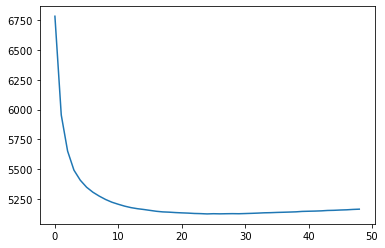

In [26]:
# 3. K-vecinos

from sklearn.neighbors import KNeighborsRegressor

kv_list_rmse = []

for i in range(1,50):
    kv = KNeighborsRegressor(n_neighbors=i)
    kv.fit(X_train, y_train)
    kv_pred = kv.predict(X_test)
    kv_rmse = np.sqrt(mean_squared_error(kv_pred, y_test))
    kv_list_rmse.append(kv_rmse)

plt.plot(kv_list_rmse)

kv = KNeighborsRegressor(n_neighbors=np.argmin(kv_list_rmse)+1)
kv.fit(X_train, y_train)
kv_pred = kv.predict(X_test)
kv_rmse = np.sqrt(mean_squared_error(kv_pred, y_test))
print(kv_rmse)

In [27]:
# predicción en test
pred_test_kv = kv.predict(dataTesting_2.loc[:,('Year', 'Mileage', 'Orden_precio')])
pred_test_kv = pd.DataFrame(pred_test_kv, index=dataTesting.index, columns=['Price'])
pred_test_kv.to_csv('pred_test_kv.csv', index_label='ID')
display(pred_test_kv.head())
display(pred_test_kv['Price'].mean())

,Price
ID,
0,23637.32
1,40019.48
2,24790.40
3,14849.92
4,31398.44


21046.80000480027

In [28]:
# 4. Bagging manual

bag_man = pd.concat((pred_test_lr, pred_test_dec_tree, pred_test_kv), axis=1)
bag_man = pd.DataFrame(bag_man.mean(axis=1), columns=['Price'])
bag_man.to_csv('bag_man.csv')
display(bag_man.head())
display(bag_man['Price'].mean())

,Price
ID,
0,22276.419584
1,38655.194393
2,24805.340628
3,12600.877032
4,32172.320568


21100.788788348586

In [29]:
# 5. Bagging con sklearn

from sklearn.ensemble import BaggingRegressor

bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)

bagreg.fit(X_train, y_train)
bagreg_pred = bagreg.predict(X_test)
bagreg_rmse = np.sqrt(mean_squared_error(bagreg_pred, y_test))
print(bagreg_rmse)

4091.8790590872595


In [30]:
# predicción en test
pred_test_bagreg = bagreg.predict(dataTesting_2.loc[:,('Year', 'Mileage', 'Orden_precio')])
pred_test_bagreg = pd.DataFrame(pred_test_bagreg, index=dataTesting.index, columns=['Price'])
pred_test_bagreg.to_csv('pred_test_bagreg.csv', index_label='ID')
display(pred_test_bagreg.head())
display(pred_test_bagreg['Price'].mean())

,Price
ID,
0,20422.81
1,37336.73
2,22651.24
3,7743.70
4,34285.84


21120.051433692104

In [ ]:
# 6. Random forest regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

params = {
 "n_estimators" : [100, 200, 300],
 "max_depth": [4,5,6,7,8]
}

rf_reg = RandomForestRegressor()

tun_rf_reg = GridSearchCV(rf_reg, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5,
                           verbose=2)

tun_rf_reg.fit(X_train, y_train)
display(tun_rf_reg.best_estimator_)
tun_rf_reg_pred = tun_rf_reg.predict(X_test)
tun_rf_reg_rmse = np.sqrt(mean_squared_error(tun_rf_reg_pred, y_test))
print(tun_rf_reg_rmse)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_rmse = np.sqrt(mean_squared_error(rf_reg_pred, y_test))
print(rf_reg_rmse)

4098.896224456895


In [34]:
from sklearn.model_selection import cross_val_score

pd.Series(cross_val_score(rf_reg, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')).describe()

count      10.000000
mean    -4100.195966
std        45.004456
min     -4170.749706
25%     -4131.494544
50%     -4104.630320
75%     -4060.591780
max     -4043.892886
dtype: float64

In [69]:
# 7. XGBoost

from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
xgbr_rmse = np.sqrt(mean_squared_error(xgbr_pred, y_test))
print(xgbr_rmse)

4288.123491295201


In [64]:
# predicción en test
pred_test_xgbr = xgbr.predict(dataTesting_2)
pred_test_xgbr = pd.DataFrame(pred_test_xgbr, index=dataTesting.index, columns=['Price'])
pred_test_xgbr.to_csv('pred_test_xgbr_esc.csv', index_label='ID')
display(pred_test_xgbr.head())
display(pred_test_xgbr['Price'].mean())

,Price
ID,
0,21076.845703
1,36633.679688
2,20710.632812
3,10402.545898
4,28708.453125


21110.240234375

In [ ]:
# 8. Calibración hiperparámetros

from sklearn.model_selection import RandomizedSearchCV

params = {
 "learning_rate" : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.25],
 "gamma": [ 0.0, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6],
 "colsample_bytree" : [0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 1]
}

xgbr = XGBRegressor()

tun_xgbr = RandomizedSearchCV(xgbr, param_distributions=params, n_iter=10, scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,
                           verbose=2, random_state=1)

tun_xgbr.fit(X_train, y_train)
display(tun_xgbr.best_estimator_)
tun_xgbr_pred = tun_xgbr.predict(X_test)
tun_xgbr_rmse = np.sqrt(mean_squared_error(tun_xgbr_pred, y_test))
print(tun_xgbr_rmse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
# Escalar los datos

# Si no, escalar todo el dataframe original con onehotencoder y penalizar con ridge y lasso